In [5]:
from base import BasePlotter, np, plt
from oneD import Solver1D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap1D/"

# Generalising Exponential Concentrations

### [code]

In [6]:
base = BasePlotter()

# Apply rcParams configuration
base.configure_rc_params()

def compute_flux_profile(syst_params, exp_generator, cmap_name='viridis_r'):
    'Computes flux profiles for a range of exponential concentration profiles given by the system parameters and the generator function.'
    L = syst_params['L']
    n_δ = syst_params['n_δ']
    
    # Generate the exponential concentration profiles
    δ_values = np.logspace(-1, 1, num=n_δ)
    # Initialize the arrays to store the results
    c_dist_values = np.zeros(n_δ)
    flux_profile = np.zeros(n_δ)
    
    # Create the figure for the bacteria distribution and the flux
    base.fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*5 + 2, 5))
    cmap = plt.get_cmap(cmap_name)
    
    for i, δ in enumerate(δ_values):
        c_func = exp_generator(δ, L)
        diffusion_system = Solver1D(syst_params, c_func)
        diffusion_system.ode.solve()
        
        # Store the results
        c_dist_values[i] = diffusion_system.c[0]
        flux_profile[i] = diffusion_system.ode.abs_flux[0]
        
        colour = cmap(i/n_δ)

        # Plot the bacteria distribution
        if (i+1) % 5 == 0:
            ax1.plot(
                diffusion_system.x, diffusion_system.c,
                color=colour, label= rf'$\delta$ = {δ:.2f}'
                )
        else:
            ax1.plot(diffusion_system.x, diffusion_system.c, color=colour)

        # Plot the flux
        ax2.scatter(δ, flux_profile[i], color=colour)
    
    # title = 'Bacterial Concentrations'
    configure_axes(ax1, 'x', '$c(x;\\delta)$')
    ax1.legend(loc='best', fontsize='small')
    # title = 'Diatom Flux under Varying\nBacterial Exponential Distributions'
    configure_axes(ax2, 'Characteristic length ($δ$)', '$|\\Phi(x=0)|$')

    plt.show()

    return δ_values, c_dist_values, flux_profile

def configure_axes(ax, xlabel, ylabel, title=None):
    'Configures the axes of the plot.'
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)

### Set of Decreasing Exponentials 📄
$$
c_{\text{exp}}(x; \delta) =
\frac{1}{\delta L}
\frac{\mathrm{e}^{-\frac{x}{\delta L}}}{1 - \mathrm{e}^{-\frac{1}{\delta}}}
$$

In [7]:
def exp_generator(δ, L):
    'Generates an exponential concentration profile function.'
    def c_exp(x):
        return 1 / (δ * L) * np.exp(-x / (δ * L)) / (1 - np.exp(-1/δ))
    return c_exp

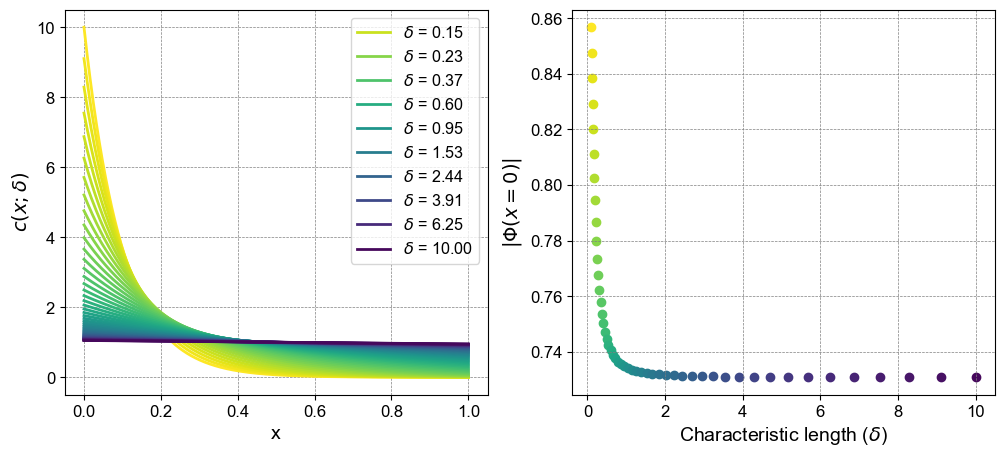

In [8]:
syst_params = {
    'L' : 1.0, 'T_ratio': 1.0,
    'nx': 1000,
    'n_δ': 50, # Number of exponential distributions considered
}
_ = compute_flux_profile(syst_params, exp_generator)
base.save(figures_path, 'c_exp_decr(x)')

### Set of Increasing Exponentials 📄
$$
c_{\text{exp}}(x; \delta) =
\frac{1}{\delta L}
\frac{\mathrm{e}^{\frac{x}{\delta L}}}{\mathrm{e}^{\frac{1}{\delta}} - 1}
$$

In [9]:
def increasing_exp_generator(δ, L):
    'Generates an exponential concentration profile function.'
    def c_exp(x):
        return 1 / (δ * L) * np.exp(x / (δ * L)) / (np.exp(1/δ) - 1)
    return c_exp

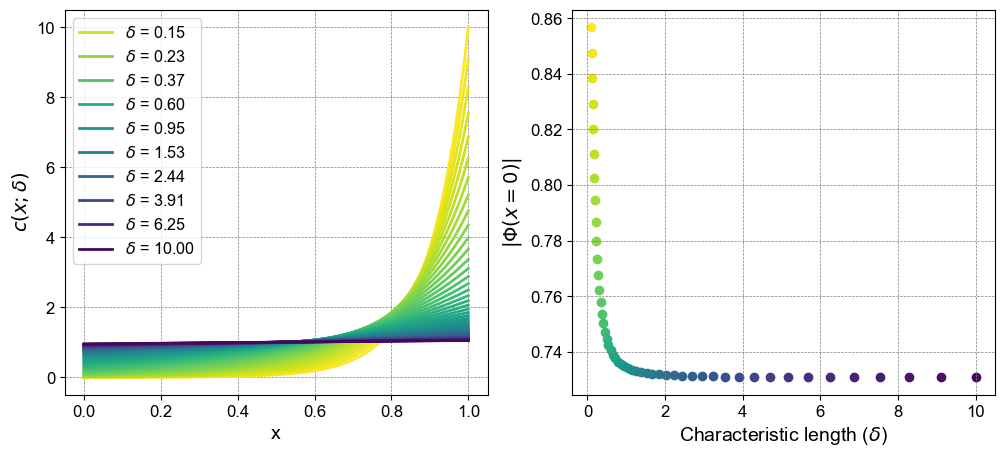

In [10]:
syst_params = {
    'L' : 1.0, 'T_ratio': 1.0,
    'nx': 1000,
    'n_δ': 50, # Number of exponential distributions considered
}
_ = compute_flux_profile(syst_params, increasing_exp_generator)
base.save(figures_path, 'c_exp_incr(x)')